<br>
<img src="https://images.even3.com.br/ONieRmTALZ2ETt2LfoUY4_IopIU=/fit-in/250x250/smart/even3.blob.core.windows.net/logos/UFCSPA-logotipo-1.19fc99573cf34163a727.png" style="width: 100px;"/>
<center>Aprendizado profundo para Visão Computacional I
    <br>
    Prof. Viviane Botelho</center>

# <center><font color='blue'>Otimização de parâmetros em redes neurais </font></center>

In [25]:
import tensorflow as tf
import keras as ke
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn.metrics as skm 
import seaborn as sns
from sklearn.model_selection import train_test_split
import os, random


%config Completer.use_jedi = False

### Banco de dados: Fashion MNIST
Contém 70 mil imagens (60mil oara treinamento e 10 mil para teste) imagens em tons de cinza em 10 categorias.
https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br

<img src="https://uploaddeimagens.com.br/images/003/297/013/full/Capturar.PNG?1624226287" style="width: 400px;"/>

**<font color='red'>Objetivo: Separar suéter de camisa (classificação binária). Assim nosso exemplo será reduzido e só usaremos imagens das classes 2 e 6 da tabela. </font>**

<br>

## Importando e normalizando os dados:


In [26]:
fashion_mnist = ke.datasets.fashion_mnist
(X2, Y2), (X_teste, Y_teste) = fashion_mnist.load_data()
X_treino, X_val, Y_treino, Y_val = train_test_split(X2, Y2, test_size=0.2,random_state=20,shuffle=True,stratify=Y2)

In [27]:
print(Y_treino)
idx_tr=np.where((Y_treino==2)|(Y_treino==6)) 

[8 2 8 ... 7 8 7]


### aqui vamos separar apenas as classes de interesse: suéter (número 2) e camisas (número 6). As demais imagens não vamos utilizar neste exemplo

In [28]:
#Separando as classes de interesse
idx_tr=np.where((Y_treino==2)|(Y_treino==6)) 
Y_treino=Y_treino[idx_tr[0]]
X_treino=X_treino[idx_tr[0]]
Y_treino[np.where(Y_treino==2)]=0
Y_treino[np.where(Y_treino==6)]=1

idx_te=np.where((Y_teste==2)|(Y_teste==6)) 
Y_teste=Y_teste[idx_te[0]]
X_teste=X_teste[idx_te[0]]
Y_teste[np.where(Y_teste==2)]=0
Y_teste[np.where(Y_teste==6)]=1

idx_te=np.where((Y_val==2)|(Y_val==6)) 
Y_val=Y_val[idx_te[0]]
X_val=X_val[idx_te[0]]
Y_val[np.where(Y_val==2)]=0
Y_val[np.where(Y_val==6)]=1

print('treino:',np.shape(X_treino))
print('teste:',np.shape(X_teste))
print('validacao:',np.shape(X_val))

treino: (9600, 28, 28)
teste: (2000, 28, 28)
validacao: (2400, 28, 28)


### <font color='red'> Obs: No exemplo de hoje não faremos validação cruzada </font>

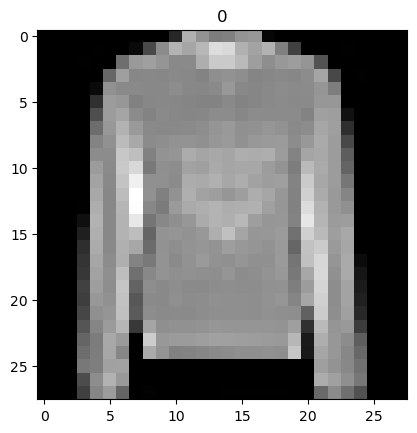

In [29]:
i=1928
plt.imshow(X_teste[i],cmap='gray')
plt.title(str(Y_teste[i]));

In [30]:
# import numpy as np
# np.random.seed(1111)
# np.random.rand(3)

In [31]:
# #import tensorflow as tf
# tf.random.set_seed(1111)
# tf.random.normal((3,1))

# Normalização

In [32]:
X_treino = X_treino/255.0
X_teste= X_teste/255.0
X_val= X_val/255.0

## Criação do Modelo: 

In [46]:
28*28*5

3920

In [44]:
model = ke.Sequential()
model.add(ke.layers.Flatten(input_shape=(28, 28,)))
#model.add(ke.layers.Dropout(0.2))
model.add(ke.layers.Dense(5, activation='relu',kernel_regularizer=ke.regularizers.l2(0.001)))
#model.add(ke.layers.BatchNormalization())
model.add(ke.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 5)                 3925      
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 3,931
Trainable params: 3,931
Non-trainable params: 0
_________________________________________________________________


## Compilando e treinando o modelo: 

In [35]:
#alterando a taxa de aprendizado
opt = tf.optimizers.Adam(learning_rate=1e-3)

In [36]:
#Criterio de parada
e1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

In [37]:
model.compile(optimizer=opt, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [38]:
# fixar estado de inicialização. Melhorar a reprodutibilidade
i=487
os.environ['PYTHONHASHSEED']=str(i)
tf.random.set_seed(i)
np.random.seed(i)
random.seed(i)
      
history=model.fit(x=X_treino, y=Y_treino,
          epochs=1000, batch_size=4500,
          validation_data=(X_val,Y_val),verbose=False,callbacks=[e1])

### Curvas de aprendizado

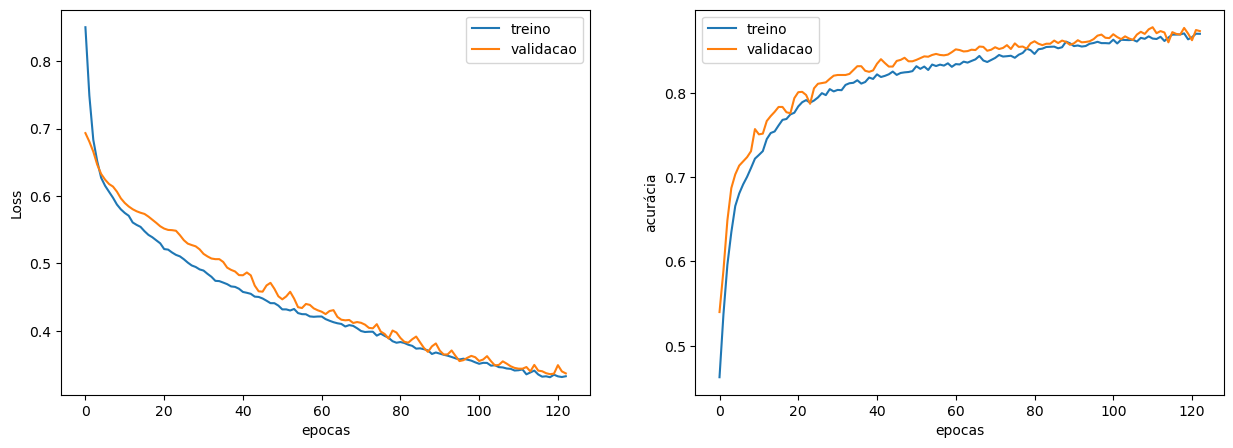

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="treino")
plt.plot(history.history["val_loss"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("Loss")
plt.legend();
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="treino")
plt.plot(history.history["val_accuracy"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("acurácia")
plt.legend();

### Matriz de confusão

63/63 [==============================] - 0s 3ms/step


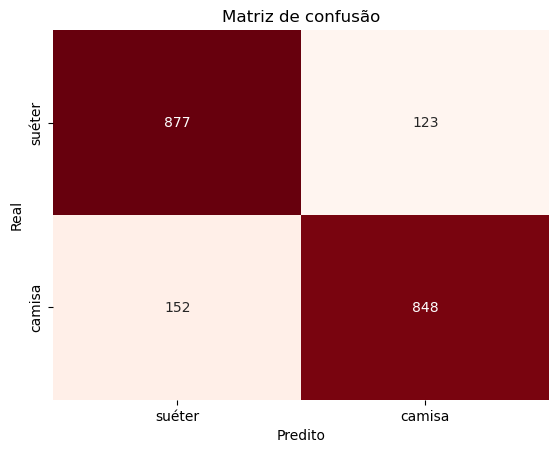

In [40]:
Y_pred_prob = model.predict(X_teste)
Y_pred = np.round(Y_pred_prob) # limiar 50%
cmat=skm.confusion_matrix(Y_teste,Y_pred)
cm_df = pd.DataFrame(cmat) 

ax= plt.subplot()
sns.heatmap(cm_df,annot=True, cmap='Reds',fmt="d",cbar=False)
plt.title('Teste')


ax.set_xlabel('Predito');ax.set_ylabel('Real'); 
ax.set_title('Matriz de confusão'); 
ax.xaxis.set_ticklabels(['suéter', 'camisa']); ax.yaxis.set_ticklabels(['suéter', 'camisa']);

### Métricas (calculadas através da matriz de confusão)

In [41]:
acuracia=np.sum(np.diag(cmat))*100/np.sum(cmat)
sensibilidade=cmat[1,1]/(cmat[0,1]+cmat[1,1])*100
especificidade=cmat[0,0]/(cmat[1,0]+cmat[0,0])*100

print('acuracia',acuracia,"%")
print('sensibilidad',sensibilidade,"%")
print('especificidade',especificidade,"%")

acuracia 86.25 %
sensibilidad 87.33264675592173 %
especificidade 85.22837706511176 %


### Curva ROC

AUC: 0.9366620000000001


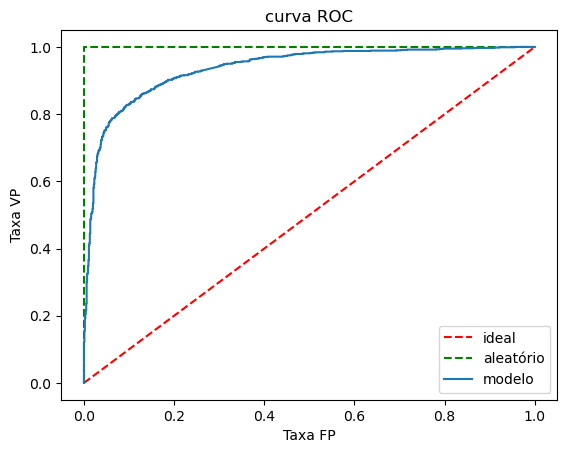

In [42]:
fpr, tpr, thresholds = skm.roc_curve(Y_teste, Y_pred_prob)
plt.plot([0, 1], [0, 1], 'r--')
plt.plot([0, 0,1], [0, 1,1], 'g--')
plt.plot(fpr,tpr)
plt.xlabel('Taxa FP')
plt.ylabel('Taxa VP')
plt.title('curva ROC')
plt.legend(['ideal','aleatório','modelo'])

print('AUC:',skm.auc(fpr,tpr))